In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
from pandas import DataFrame
np.random.seed(0)

# 1 a) Write out lnL(B) for logistic regression. Omit the constant term and use one regressor so that the model has only one parameter, B

The log-likelihood function for logistic regression with one regressor (i.e., one independent variable) and one parameter B can be written as:

$\ln L(B) = \sum_{i=1}^{n} [y_i\ln(p_i) + (1 - y_i)\ln(1 - p_i)]$

where:

$y_i$ is the binary response variable for the $i$th observation (i.e., 0 or 1)
$p_i$ is the predicted probability of the positive class (i.e., $y_i = 1$) for the $i$th observation, which is given by the logistic function:
$p_i = \frac{1}{1 + e^{-Bx_i}}$

$x_i$ is the value of the independent variable for the $i$th observation.

# 1b) Also write it using NumPy in a Python function like log_likelihood(x,y,B).

In [2]:
def log_likelihood(x, y, B):
    n = len(y)
    p = 1 / (1 + np.exp(-x*B)) # Calculating probailities using Sigmoid
    
    log_likelihoods = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    return log_likelihoods

# 1c) Generate some data with preview.png

In [3]:
n=100
x=np.random.uniform(size=(n,))
y=1*(x+.1*np.random.normal(size=(n,))>.5)

DataFrame({'X': x, "Y": y})

,X,Y
0,0.548814,0
1,0.715189,1
2,0.602763,1
3,0.544883,0
4,0.423655,1
...,...,...
95,0.183191,0
96,0.586513,1
97,0.020108,0
98,0.828940,1


# 1d) Compute log_likelihood() for many values of B (ex., using np.arange() or np.linspace()) and plot lnL vs. B. Which value of B should you choose as the estimate of beta, the parameter of the model?

In [28]:
betas = np.linspace(-10, 10, num=1000) # Generating 500 beta values
print("First 40 beta values", betas[:40])

First 40 beta values [-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992
  -9.8998999   -9.87987988  -9.85985986  -9.83983984  -9.81981982
  -9.7997998   -9.77977978  -9.75975976  -9.73973974  -9.71971972
  -9.6996997   -9.67967968  -9.65965966  -9.63963964  -9.61961962
  -9.5995996   -9.57957958  -9.55955956  -9.53953954  -9.51951952
  -9.4994995   -9.47947948  -9.45945946  -9.43943944  -9.41941942
  -9.3993994   -9.37937938  -9.35935936  -9.33933934  -9.31931932
  -9.2992993   -9.27927928  -9.25925926  -9.23923924  -9.21921922]


## Log Likelihood for 1 beta

In [29]:
print("Log likelihood with the first beta", log_likelihood(x, y, betas[0]))

Log likelihood with the first beta -364.6837390936189


## Log likelihood for all betas

In [30]:
log_likelihoods = [log_likelihood(x, y, beta) for beta in betas ]
log_likelihoods

[-364.6837390936189,
 -363.9910781919891,
 -363.29848289289157,
 -362.6059535763583,
 -361.9134906254796,
 -361.221094426435,
 -360.5287653685231,
 -359.8365038441923,
 -359.14431024907157,
 -358.45218498200217,
 -357.760128445069,
 -357.0681410436331,
 -356.3762231863635,
 -355.68437528527045,
 -354.9925977557385,
 -354.30089101655926,
 -353.6092554899664,
 -352.91769160166933,
 -352.22619978088767,
 -351.53478046038646,
 -350.84343407651187,
 -350.1521610692264,
 -349.4609618821458,
 -348.76983696257486,
 -348.0787867615453,
 -347.38781173385235,
 -346.69691233809385,
 -346.00608903670695,
 -345.3153422960082,
 -344.6246725862319,
 -343.93408038157025,
 -343.24356616021316,
 -342.55313040438847,
 -341.8627736004032,
 -341.17249623868554,
 -340.4822988138254,
 -339.7921818246186,
 -339.1021457741076,
 -338.4121911696269,
 -337.72231852284534,
 -337.0325283498114,
 -336.3428211709975,
 -335.65319751134587,
 -334.96365790031376,
 -334.27420287192047,
 -333.58483296479363,
 -332.89554872

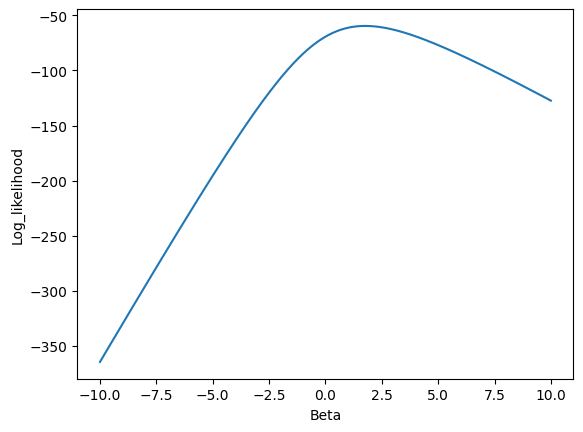

In [31]:
plt.plot(betas, log_likelihoods)
plt.xlabel('Beta')
plt.ylabel('Log_likelihood')
plt.show()

In [32]:
print("Maximum log likelihood is", max(log_likelihoods))

Maximum log likelihood is -59.5281642393577


In [33]:
print(f'We choose {betas[np.argmax(log_likelihoods)]} value for the beta')

We choose 1.7717717717717711 value for the beta
